<H1>Pythonで統計学を学ぶ(1): はじめに</H1>

これは、白井の「確率統計学B」の資料です。
<P>
この内容は<A HREF="http://shop.ohmsha.co.jp/shop/shopdetail.html?brandcode=000000001781&search=978-4-274-06710-5&sort=" target="_blank">山田、杉澤、村井(2008)「R」によるやさしい統計学</A>を参考にしています。
<P>
この項では、「1 つの変数の記述統計」をとりあげます。
<p>学習項目です</p>
<ul class="important">
<li class="important"><A HREF="#RS01:summary">一つの変数の要約</A></li>
<li class="important"><A HREF="#RS01:visual">データの視覚的表現</A></li>
<li class="important"><A HREF="#RS01:average">代表値</A></li>
<li class="important"><A HREF="#RS01:dispersoin">散布度</A></li>
<li class="important"><A HREF="#RS01:normalization">標準化と偏差値</A></li>
<LI class="important"><A HREF="#Functions">関数のまとめ</A>
<LI class="important"><A HREF="#Exercises">演習問題</A>
</ul>

<H2><A NAME="RS01:summary">一つの変数の要約</A></H2>
この章は一つの変数をどのように記述するか、について説明しています。
<P>
[参考] 統計学における「変数」とは:
<blockquote>
例えば、数学のテストの点数や辛いものの好き嫌いを考えましょう。これらは人それぞれで違う値をとります。
それを統計学では『変数』と呼んでいます。
<P>
数学テストの点数」という変数は、人によって例えば80点, 60点, 75点などの値をとります。これらの値は大小比較ができますので、<font class="word">量的変数</font>といいます。<p>
それに対し、『辛いものの好き嫌い』も人それぞれで違う値をとりますが、『好き』『嫌い』『どちらでもない』の3種類に値が分けられるでしょう。このように「種類(カテゴリ)」による分類を値とする変数は<font class="word">質的変数</font>と言います。
</blockquote>
ここでは<FONT class="important">数値要約</FONT>に焦点をあてます。数値要約とは、データの持つ特徴を一つの数値にまとめる、ということで、後で取り上げる平均や中央値がその代表的なものです。
<P>
ここで、変数の種類に二通りあることに注意してください。
<UL class="important">
  <LI> <font class="important">質的変数</font>: データを分類したもの(例: 男/女、好き/嫌い)を値とする。またその値(分類)を<FONT class="important">カテゴリ</font>という。</LI>
  <LI> <font class="important">量的変数</font>: データが数で表され、データの種類ではなく、その値の大小(数量)に意味がある。</LI>
</UL>

<h4>課題1-1</h4>
 質的変数と量的変数の違いについてなるべく自分の言葉で説明してください。
また、値が0と1の2つだけを取る変数は<font class="important">二値変数</font>と言いますが、これは 質的変数でしょうか、量的変数でしょうか。二値変数の具体的な例をあげて、それが質的変数なのか量的変数なのかの理由を含めて答えてください。

解答欄


<H2><A NAME="RS01:visual">データの視覚的表現</A></H2>
<P>量的変数ではその値の範囲の分類 (例えば、値が100未満、100以上200未満、200以上、のように分類する)や、質的変数では、その値であるカテゴリをとりあげましょう。
それぞれの分類(カテゴリ)に含まれるデータの個数を調べることはよく行われています。
それぞれの分類に含まれるデータの個数を<font class="important">度数</font>といい、すべての分類について度数を求めたものを<font class="important">度数分布</font>といいます。
<P>
質的データや、量的データでも値が離散型のデータにおいて、そのデータの値とそれが現れる度数(頻度)をまとめたものを<font class="word">度数分布</font>といい、それを表で表したものを<font class="word">度数分布表</font>といいます。例えば、80名の学生の物理学の成績をS, A, B, C, Dの5ランクに分けたとき、それぞれのランクの人数の分布は度数分布といえます。<P>


| 成績のランク|　 S |　 A |　B | C |　D |
|:---:|---:|---:|---:|---:|---:|
 |度数 | 3  | 5| 28| 34|10|

これはもともと次のような分布の成績でした:

In [1]:
Buturi = ["D", "B", "C", "B", "D", "B", "D", "C", "C", "C", "S", "C", "A", "B", "B", "C", "B", "C",
    "S", "B", "A", "A", "C", "B", "B", "C", "B", "B", "C", "B", "C", "A", "B", "C", "D", "C", "B", "C",
    "D", "C", "D", "D", "C", "C", "B", "B", "C", "C", "B", "C", "B", "D", "C", "B", "C", "C", "B", "A",
    "B", "B", "B", "B", "B", "C", "C", "C", "B", "D", "C", "C", "B", "C", "C", "C", "C", "S", "C", "C",
    "D", "B"]

このデータから度数分布表を作るには以下のようにします。まずButuriデータにはどのような値があるかをset関数を用いて調べます。

In [3]:
Grades = set(Buturi)
print(Grades)

set(['S', 'A', 'C', 'B', 'D'])


In [4]:
dosu = { key: Buturi.count(key) for key in Grades} # 辞書として度数分布表を作る
print(dosu)

{'A': 5, 'S': 3, 'B': 28, 'C': 34, 'D': 10}


これをまとめてtableという関数を作っても良いかもしれません。

    def table(lst):
        return {key:lst.count(key) for key in set(lst)}



In [34]:
def table(lst):
        return {key:lst.count(key) for key in set(lst)}

print(table(Buturi))

{'A': 5, 'S': 3, 'B': 28, 'C': 34, 'D': 10}


参考：ヒストグラムを書く

([<matplotlib.axis.XTick at 0x7f3d0588d450>,
 <a list of 5 Text xticklabel objects>)

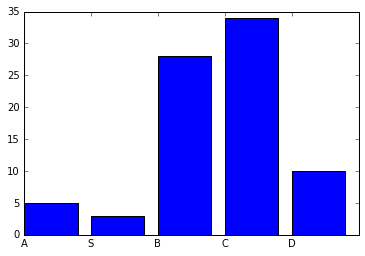

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
ind=range(len(dosu.keys()))
plt.bar(ind,dosu.values())        # 棒グラフを書く
plt.xticks(ind, dosu.keys())      # x座標にラベルを貼る

In [6]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      

実は、元をたどるとButuriは、次のような素点(100点満点で成績をつけたもの)から得られたものでした:

In [36]:
 Seiseki =[59, 74, 64, 73, 59, 71, 57, 60, 68, 65, 99, 61, 86, 75, 78, 66, 73, 61, 91, 
     77, 87, 81, 64, 71, 71, 63, 72, 76, 66, 72, 67, 84, 73, 68, 57, 66, 74, 60, 52, 69, 54,
     59, 65, 65, 71, 79, 64, 67, 73, 68, 70, 59, 64, 71, 61, 62, 74, 83, 77, 74, 75, 75, 75, 
     65, 65, 69, 73, 58, 69, 64, 75, 67, 68, 61, 62, 90, 69, 60, 57, 73]

先にあげた度数分布は、90点以上をS、80点以上90点未満をA, 70点以上80点未満をB、60点以上70点未満をC、60点未満をDとして分類し、それぞれの分類に該当する人数を表にしたものでした。ちなみに、S,A,B,C,Dは名義尺度の質的データです。


度数分布から、横軸にデータの分類を、縦軸にその度数を表すグラフを書いたものを<font class="word">ヒストグラム(histogram)</font>と言います。
Pythonでは matplotlibモジュールのhistという関数で表示させることができます。
これを実行して表示されるのが以下のグラフです。成績データを10個に分類し、それぞれの分類にはいる人数を縦軸に表示しています。何通りに分類されるかはコンピュータ任せですが、この場合は4.7点刻みで分類されています。

(array([  2.,  15.,  16.,  12.,  22.,   5.,   3.,   2.,   2.,   1.]),
 array([ 52. ,  56.7,  61.4,  66.1,  70.8,  75.5,  80.2,  84.9,  89.6,
         94.3,  99. ]),
 <a list of 10 Patch objects>)

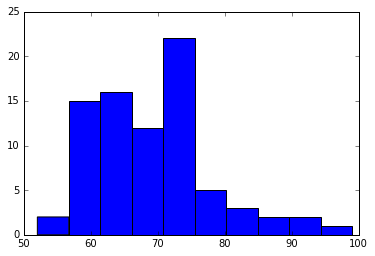

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(Seiseki)

histにはどこで分類するかをbinsオプションで指定することができます。次は50点(最小値)、60点、70点、80点、90点、100点(最大値)という分類範囲を指定したものです。この結果表示されるのが次のグラフです。

(array([ 10.,  34.,  28.,   5.,   3.]),
 array([ 50,  60,  70,  80,  90, 100]),
 <a list of 5 Patch objects>)

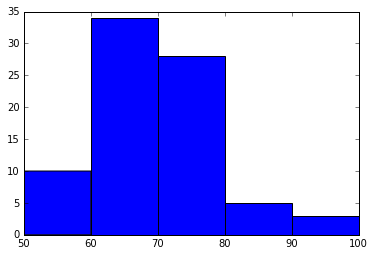

In [39]:
plt.hist(Seiseki,bins=(50,60,70,80,90,100))

In [7]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        arra

<h4>課題1-2.</h4>
以下のような数学のテストの素点がある。ヒストグラムを表示せよ。 また、10点未満は"D", 10点以上12点以下は"C", 13点以上15点以下は"B"、16点以上は"A"と分類するものとし、度数分布表を作れ。


In [40]:
# 課題1-2.
Math = [17,13,14,7,12,10,6,8,15,4,14,9,6,10,12,5,12,8,8,12,15,18]

---


<H2><A NAME="RS01:average">代表値</A></H2>
<P>
<font class="word">代表値</font>とは、データを代表する値のことで、
後述しますが、データの分布の型が「正規分布である」というように分かっている場合はそのパラメタ(正規分布の場合は平均と分散)、そうでない場合はデータの分布の中心的な値が代表値となります。<font clas="word">要約統計量</font>ということもあります。
<P>代表値としては、次の三つの値がよく使われます:
<UL class="important">
  <LI><font class="important">平均</font> (mean)
  <LI><font class="important">中央値</font> (median) 
  <LI><font class="important">最頻値</font> (most frequent value)
</UL>



<h4>課題1-3</h4>
(算術)平均、中央値、最頻値、それぞれの定義を簡潔に説明しなさい。
また、代表値として(平均値や中央値ではなく)最頻値を用いる場合はどのような場合かも答えなさい。<BR>
[ヒント] 平均値や中央値が計算出来ない場合に、最頻値を使います。
つまり、最頻値を代表値として使う場合は、データの値が数量として意味を持たない場合です。
それは変数の種類としてはどういうものだったでしょうか。具体的に答えてください。

解答欄

<h4>課題1-4</h4>
次を実行して得られたdataの値に対し、(算術)平均、中央値、最頻値、それぞれの値を求めなさい。
また、求めるために用いたPythonのコードもあわせて答えなさい。
なお、numpy.randomモジュールのrandint関数は、一様分布に基づく「整数」乱数を生成する関数です。
`random.randint(min,max)`により、min以上max以下の整数乱数が1個生成されます。

[ヒント] numpyモジュールには平均値を求める関数はありますが、中央値や最頻値を求める関数は用意されていません。Python3で使えるstatisticsモジュールにはあるかも...

In [ ]:
# 課題1-4の計算・解答用


In [40]:
help(random.randint)

Help on built-in function randint:

randint(...)
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is the *highest* such
        integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.

In [41]:
# 参考: 一様分布に従う [0,1) の実数の乱数
help(random.random)

Help on built-in function random_sample:

random_sample(...)
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_sample())
    <type 'float'>
    >>> n

In [66]:
import numpy as np
data = np.array(data)
print("mean = %8.2f" % (data.mean()))
data.sort()
print(data)

mean =    58.68
[  0   1   8   8   9  10  11  18  19  19  24  24  25  26  26  27  28  29
  30  31  32  32  38  39  40  40  42  43  44  45  45  47  48  48  48  49
  49  50  51  51  54  54  55  55  55  57  58  58  58  59  59  60  60  61
  61  61  62  66  66  67  69  71  71  72  73  76  76  76  79  80  81  81
  81  81  82  83  85  85  85  87  87  87  88  90  90  90  91  91  91  92
  92  93  93  94  95  97  97  97  99 100]


<H2><A NAME="RS01:dispersoin">散布度</A></H2>
<P>
<font class="word">散布度</font>とは、変数の値の散らばりのことです。
どんなデータでも、平均だけではその特徴はわかりません。
平均のまわりにどのようにデータが散らばっているかも、データも性質を考える上でとても重要な情報です。
<P>
$n$はデータの個数, $x_1,\ldots,x_n$はデータ、$\mu$はその平均とします。
散布度を表すのによく使われる<font class="word">標本分散</font>
(sample variance)の定義は以下のとおり:
$$
標本分散 = \frac{ (x_1 - \mu)^2 +  (x_2 - \mu)^2  + \cdots + (x_n - \mu)^2 }{n} = \frac{1}{n}\sum_{i=1}^n (x_i-\mu)^2
$$
これに対し、<FONT class="word">不偏分散</FONT>(unbiased variance)
の定義は以下のとおりです:
$$
不偏分散 = \frac{ (x_1 - \mu)^2 +  (x_2 - \mu)^2  + \cdots + (x_n - \mu)^2 }{n-1} = \frac{1}{n-1}\sum_{i=1}^n (x_i-\mu)^2
$$
不偏分散の定義では、分母は(標本分散では$n$に対して) $n-1$ です。
<P>
標本分散と不偏分散の違いについて説明します。
標本分散は、手元にあるデータの「散らばり」を表す値です。
それに対し、不偏分散は、「手元にあるデータは何らかの大きなデータの集まり
(これを<font class="word">母集団</font>といいます)から抽出したもの」と考え、
母集団のデータの散らばりを推定した値です。
そして、Pythonでは標本分散を計算するため、numpyモジュールに関数<font class="word">var</font>
が用意されています。(不偏分散を求めるには `ddof=1`というオプションが必要です )

---
参考: 母集団と標本(長い説明)
<blockquote>
統計におけるとても重要な用語の一つが<FONT class="word">母集団</font>です。まずはこれが何を意味しているか、例を使って説明します。母集団のおおまかな意味は「推測対象の要素の集まり」ということです。先ほどの「あなたが作った機械の製品」の例では、「その機械が将来にわたって作る製品の不良品の割合」が推測したいものでした。これは「作り出される製品すべて」と「その中の不良品すべて」が分かれば計算できます。そこで推測対象として「機械が作り出す製品(の良さ)」を考えましょう。そしてこの「製品(の良さ)」が母集団となります。もちろんこの中にはまだ存在していないものも含まれています。そこでこの場合、母集団の要素の個数は無限個とみなせます。このときの母集団を<font class="word">無限母集団</font>といいます。このように、母集団の要素数が多かったり、実際には存在していないものだったりすることがあるので、母集団をそのまま扱うことは一般に難しいのです。<P>
この母集団に対して、<FONT class="word">標本(サンプル)</font>という用語があります。先の機械の例で言えば、その機械で作られ、実際に手元にある製品100個(の良さの割合)が「標本」に相当します。このように、標本とは母集団の一部です。そして、統計学は、この標本(サンプル)の性質を調べることによって、母集団の性質を予測したり、比較したりする手段を与えてくれます。
<P>
別な例として選挙を例にします。大きな選挙があるたびに、新聞やテレビなどのメディアでは選挙結果の予測を行います。この予測はどのような方法で行われているのでしょうか。
<BR>
この場合、母集団の要素は、選挙人それぞれによる投票結果といえます。人口200万人の名古屋市くらいの都市なら、選挙人(要するに投票権がある人)の総数は100万人以上いるでしょう。その人達一人ひとりに、どの政党に投票するかを聞いて回るのはとても大変ですし、お金もかかります。
そこで、メディアではランダムに電話をかけどの政党に投票するかを聞くという方法(Random Digit Sampling)をとっています。そうやって標本を集めます。およそ1千分の1から1万分の1くらいの人数、200万人ならば1,000人くらいを調査の対象としているようです。
<P>
この場合は、機械の例と異なり、有限で実在する人たちの投票が母集団でした。投票そのものはまだ行われていないので母集団の要素は実在しませんが、そこにいる人達の考えがそのまま投票に反映されるとすれば、母集団は無限でも存在しない要素を含まないともみなせます。そこで、この母集団は<font class="word">有限母集団</font>といえるでしょう。それでも、母集団をすべて調べるのではなく、標本の性質を調べることによって母集団の振る舞いを予測することが行われています。
<P>
このような扱いは残念ながら、統計学の教科書で一致していません。後で取り上げるｚ値や偏差値の計算には、標準偏差を標本分散の平方根とする方が扱いやすいからかもしれません。
<P>
ですから、他の統計学の本を読む場合には、分散と標準偏差の定義にまず気をつけてください。
</blockquote>

---
各データの値から平均を引いたものを<font class="word">平均からの偏差</font>といい、<font class="word">平均偏差</font>とは、「平均からの偏差」の絶対値の平均で、平均からどの程度ずれているかを表す数値です。
<P>
また<font class="word">範囲(レンジ)</font>とは、データの最大値と最小値の差のことで、データの値の変化の大きさを表します。
<P>
なお、平均偏差と紛らわしいのですが、<font class="word">標準偏差</font>(standard deviation) は分散の正の平方根の値で、とても大事な指標です。Pythonのnumpyモジュールでは std という関数が用意されており、これは標本分散の平方根を返します(不偏分散の平方根としての標準偏差を求めるには`ddof=1`というオプションをつける必要があります)。


<h4>課題1-5</h4>
課題1-4で用いた data の値を使って、標本分散、その正の平方根、不偏分散、その正の平方根(標準偏差)をそれぞれ求めよ。また、その計算に用いたPythonのコードを答えよ。
さらに、標本分散と不偏分散の大きさを比較して、不偏分散の方が大きいことを確かめよ。

[課題1-5のヒント]
Pythonのnumpyモジュールには標本分散とその平方根(標準偏差)を計算するための関数があります。そして、
不偏分散とその平方根を求めるにはオプションを指定するか、標本分散とサンプルサイズを用いて計算する必要があります。

In [ ]:
# 課題1-5　計算・解答用

<h4>課題1-6</h4>
課題1-4で用いた data の値を使って、次を計算せよ(計算に用いたPythoonのコードも示すこと)。そしてこれが標本分散の値と一致することを確かめよ。ただし$x_i$をデータの要素、$n$をデータの要素の個数、$\bar{x}$をデータの要素の平均とする。
$$ \frac{1}{n} \sum_{i=1}^n x_i^2  -  \bar{x}^2 $$


[課題1-6のヒント]
「データの要素の2乗の和」はPythonでは簡単に求められます。変数dataにnumpy.ndarray型のデータが入っているとすると、<font class="rule">data**2</font>で「データの要素の2乗」を要素とするベクトルが得られます。そして関数 sum によりその和を求めることができます。 

In [71]:
# 課題1-6 計算・解答用
# 参考
data**2

array([    0,     1,    64,    64,    81,   100,   121,   324,   361,
         361,   576,   576,   625,   676,   676,   729,   784,   841,
         900,   961,  1024,  1024,  1444,  1521,  1600,  1600,  1764,
        1849,  1936,  2025,  2025,  2209,  2304,  2304,  2304,  2401,
        2401,  2500,  2601,  2601,  2916,  2916,  3025,  3025,  3025,
        3249,  3364,  3364,  3364,  3481,  3481,  3600,  3600,  3721,
        3721,  3721,  3844,  4356,  4356,  4489,  4761,  5041,  5041,
        5184,  5329,  5776,  5776,  5776,  6241,  6400,  6561,  6561,
        6561,  6561,  6724,  6889,  7225,  7225,  7225,  7569,  7569,
        7569,  7744,  8100,  8100,  8100,  8281,  8281,  8281,  8464,
        8464,  8649,  8649,  8836,  9025,  9409,  9409,  9409,  9801, 10000])

---
<h2><A NAME="RS01:normalization">標準化</A></h2>
<font class="word">標準化</font>とは、平均と標準偏差がある特定の値になるように、すべてのデータの値を変換することをいいます。<font class="word">標準得点</font>とは、標準化によって変換された得点のことで、
z得点と偏差値の2つがよく用いられます。
<P>
<font class="word">z得点</FONT>とは、平均が0、標準偏差が1になるよう変換した標準得点のことです。ただしここでは後述する偏差値と同様に、<font class="rule">標準偏差は標本分散の平方根</font>とします。
$$ z得点 = \frac{データの値 － 平均}{標準偏差}$$
また、平均が50、標準偏差が10になるよう変換した標準得点のことを<font class="word">偏差値</font>といいます。偏差値とz得点の間には以下の関係が成り立ちます:
$$偏差値 = z得点 * 10 + 50$$

<h4>課題1-7</h4>
0. 以下に示す変数 PsycTest の値を用いて、平均、標本分散、(標本分散の平方根としての)標準偏差をそれぞれ求めよ。

```
from __future__ import division
import numpy as np

PsycTest = np.array( [13, 14, 7, 12, 10, 6, 8, 15, 4, 14, 9, 6, 10, 12, 5, 12, 8,  8, 12, 15] )
```

2. PsycTest のデータをすべてz得点に変換せよ。
3. z得点に変換したデータの平均が0、標準偏差が1であることを確認せよ。
4. どのようなデータでも、そのデータをz得点に変換すると、平均が0、標準偏差が1となることの理由を数学的に説明せよ。
5.  PsycTest のデータをすべて偏差値に変換せよ。
6.  偏差値に変換したデータの平均が50、標準偏差が10であることを確認せよ。

[課題1-7のヒント]
変数dataのデータをz得点に変換するためのアルゴリズムを書きます。
<OL>
  <LI> mにdataの平均値をセットしておきます: <TT> m = np.mean(data)</T>
  <LI> nにdataの長さをセットしておきます: <TT> n = len(data)</T>
  <LI> sd に dataの標本分散の平方根をセットします : 課題1-5参照
  <LI> dataの各要素に対し、mを引きsdで割った値がz得点です: 
    <TT>(data - m)/sd</TT>
</OL>
偏差値はz得点から求めるのが簡単です。

In [79]:
from __future__ import division
import numpy as np

PsycTest = np.array( [13, 14, 7, 12, 10, 6, 8, 15, 4, 14, 9, 6, 10, 12, 5, 12, 8,  8, 12, 15] )

In [ ]:
# 課題1-7　計算・解答用

---

<H2><A NAME="Functions">関数のまとめ</A></H2>

注: 以下では numpyをnp, numpy.random を random, matplotlib.pyplotをpltと略記する

| 目的 | 関数名とモジュール | 使い方 |
|:---|:---|:---|
|度数分布(「辞書」)の作成 | 自作　`table` (リスト) | table(['A','B','A','C','B','C','C','B','C','D','A']) |
|棒グラフの描画 | plt.bar(x座標リスト,y座標データ) | plt.bar(range(5),[20,3,5,8,1]) |
|ヒストグラムの描画 | plt.hist(データ) | plt.hist([59, 74, 64, 73, 59, 71, 80]) |
|合計(総和) | sum(リスト) もしくは np.sum(配列) | sum([1,2,3]), np.sum(np.array([1,2,3]))|
|データの個数 | len(リスト) | len(['A','B','A','C','B','C','C','B','C','D','A']) |
|平均を求める| np.mean(配列) | np.mean(np.array([[1,2,3],[3,2,5]])) |
|標本分散を求める | np.var(配列) | np.var([59, 74, 64, 73, 59, 71, 80]) |
|不偏分散を求める | np.var(配列, ddof=1) | np.var([59, 74, 64, 73, 59, 71, 80], ddof=1) |
|標準偏差を求める | np.std(配列) もしくは np.std(配列, ddof=1) | np.std([59, 74, 64, 73, 59, 71, 80], ddof=1) |
|絶対値を求める | abs(数) もしくは np.abs(数) | abs(-1.23) |
|平方根を求める | 数\**0.5 もしくは np.sqrt(数) | np.sqrt(2.0) |
|最大値を求める | max(リスト) もしくは np.max(配列) | np.max([2,6,9,3,8]) |
|最小値を求める | min(リスト) もしくは np.min(配列) | np.min([2,6,9,3,8])|
|一様乱数を生成(整数)| random.randint(m,n) : [m,n)の整数 | random.randint(1,7) : さいころの出目|
|一様乱数を生成([0,1)の実数)| random.random(個数) | random.random(10) : 10個の乱数生成|

<H2><A NAME="Exercises">演習問題</A></H2>
以下では『標準偏差』は、標本分散の正の平方根とする。
<h3>演習問題1-1</h3>
以下は２つの大学(Auniv, Buniv)における学生を対象とした勉学時間の調査です。それぞれの大学ごとに(1)ヒストグラムを書き、(2)平均と標準偏差を求め、(3)データを標準化せよ。ただしコードと、表示された結果を提出すること。
<PRE class="code">
import numpy as np
Auniv = np.array([60,100,50,40,50,230,120,240,200,30])
Buniv = np.array([50,60,40,50,100,80,30,20,100,120])
</PRE><P>


In [ ]:
# 問題1-1(1)

In [ ]:
# 問題1-1(2)

In [ ]:
# 問題1-1(3)

<h3>演習問題1-2</h3>
あるクラスで行った統計学の試験の結果は以下のような結果であった。
<pre class="code">
 20, 55, 30, 82, 75, 66, 40, 60, 50, 29, 81, 60, 88, 91, 86, 91, 99, 73, 42
</pre>
以下の質問に答えなさい。
<OL>
  <LI>このデータを(配列として) testという変数の値とせよ。(ヒント:問題1-1で示されているコード)
  <LI>ヒストグラム(histogram)を書け。そのためのコードと結果を示せ。<BR>
  <LI>平均を求めたい。そのためのコードと結果を示せ。
  <LI>不偏分散を求めたい。そのためのコードと結果を示せ。
  <LI>標準偏差を求めたい。そのためのコードと結果を示せ。
  <LI>不偏分散と標本分散の違いはなにか、簡潔に答えよ。
(ヒント; <A HREF="#RS01:dispersoin">散布度</A>の項で述べられているそれぞれの定義と「母集団と標本（長い説明)」の説明）
  <LI>偏差値に変換せよ。そのためのコードと結果を示せ。
</OL>

In [ ]:
# 問題1-2 (1)

In [ ]:
# 問題1-2 (2)

In [ ]:
# 問題1-2 (3)

In [ ]:
# 問題1-2 (4)

In [ ]:
# 問題1-2 (5)

問題1-2 (6)の解答欄


In [ ]:
# 問題1-2 (7)